Loading the IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

25000

In [ ]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [ ]:
max([max(sequence) for sequence in train_data])

9999

Preparing the data

Encoding the integer sequences into a binary matrix

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [9]:
(x_train).shape

(25000, 10000)

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Building your network

The model definition

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
len((train_data[0])),len(test_data[0])

(218, 68)

In [ ]:
len(train_data[1])

189

 Compiling the model

In [12]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

Setting aside a validation set


In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

  Training your model

In [14]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.4928 - accuracy: 0.7754 - val_loss: 0.3427 - val_accuracy: 0.8778
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2755 - accuracy: 0.9049 - val_loss: 0.2866 - val_accuracy: 0.8891
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2000 - accuracy: 0.9313 - val_loss: 0.2895 - val_accuracy: 0.8848
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1585 - accuracy: 0.9438 - val_loss: 0.2941 - val_accuracy: 0.8830
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1255 - accuracy: 0.9595 - val_loss: 0.3075 - val_accuracy: 0.8817
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1009 - accuracy: 0.9674 - val_loss: 0.3255 - val_accuracy: 0.8802
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0786 - accuracy: 0.9763 - val_loss: 0.3764 - val_accuracy: 0.8711
Epoch 8/20
30

In [17]:
 history_dict = history.history
 import pandas as pd
 pd.DataFrame(history_dict)

,loss,accuracy,val_loss,val_accuracy
0,0.492811,0.775400,0.342725,0.8778
1,0.275476,0.904933,0.286587,0.8891
2,0.200005,0.931333,0.289521,0.8848
3,0.158495,0.943800,0.294074,0.8830
4,0.125525,0.959533,0.307542,0.8817
5,0.100935,0.967400,0.325491,0.8802
6,0.078645,0.976333,0.376367,0.8711
7,0.063622,0.981200,0.366158,0.8791
8,0.045466,0.988867,0.459169,0.8605
9,0.037301,0.991000,0.491286,0.8596


In [18]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plotting the training and validation loss

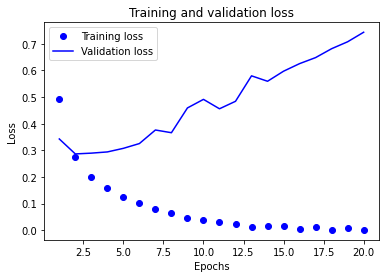

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['val_accuracy']) + 1) #range(20)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4537 - accuracy: 0.8214
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2577 - accuracy: 0.9085
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2001 - accuracy: 0.9283
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2980 - accuracy: 0.8822


In [21]:
results

[0.2979626953601837, 0.8822399973869324]

In [30]:
pred = model.predict(x_test[:100])

4/4 [==============================] - 0s 4ms/step


In [31]:
pred.shape

(100, 1)

In [32]:
pred=pred.reshape(100)

In [28]:
np.where(pred>0.5,"Positive","Negative")

array(['Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Negative', 'Positive', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Negative', 'Negati

In [34]:
pred = model.predict(x_test[100:150])
pred

2/2 [==============================] - 0s 18ms/step


array([[4.8520762e-02],
       [3.9301839e-01],
       [6.0216702e-05],
       [1.6497789e-02],
       [1.4166364e-02],
       [3.2288321e-05],
       [1.5192237e-02],
       [1.2311327e-01],
       [8.5379755e-01],
       [9.9805665e-01],
       [9.9994707e-01],
       [7.4317574e-04],
       [7.4718827e-01],
       [1.7998615e-01],
       [6.8523400e-02],
       [7.1291715e-01],
       [7.8827643e-01],
       [5.9603562e-04],
       [5.8783740e-01],
       [9.5945150e-01],
       [2.1640789e-03],
       [3.7356201e-01],
       [4.8892763e-03],
       [9.9366152e-01],
       [9.8597449e-01],
       [7.4691355e-01],
       [8.3547556e-01],
       [1.7091366e-02],
       [1.1746624e-03],
       [4.7411937e-03],
       [8.1199580e-01],
       [5.5346817e-02],
       [5.0205994e-02],
       [9.9943566e-01],
       [3.7487340e-01],
       [3.6060531e-02],
       [4.0602136e-02],
       [4.1542118e-03],
       [1.1898647e-03],
       [5.5531241e-02],
       [7.5791985e-01],
       [9.089451

In [41]:
results = pd.DataFrame(pred, columns=['PredictedProb'])
results

,PredictedProb
0,0.048521
1,0.393018
2,0.000060
3,0.016498
4,0.014166
5,0.000032
6,0.015192
7,0.123113
8,0.853798
9,0.998057


In [42]:
results['final'] = results['PredictedProb'].apply(lambda x:np.where(x>0.5, "pos", 'neg'))

In [43]:
results

,PredictedProb,final
0,0.048521,neg
1,0.393018,neg
2,0.000060,neg
3,0.016498,neg
4,0.014166,neg
5,0.000032,neg
6,0.015192,neg
7,0.123113,neg
8,0.853798,pos
9,0.998057,pos


In [45]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.word_tokenize(x)

In [51]:
import string 
from nltk.stem.porter import PorterStemmer 
punc  = string.punctuation
stem = PorterStemmer()

In [58]:
def preprocess(review):
  text =""
  for char in review:
    if char not in punc:
      text +=char 
  stem_text=""
  words = text.split(" ")
  for word in words:
      stem_text += stem.stem(word)+" "
  return stem_text

In [59]:
preprocess("What a boring movie. Full waste fo time and $money !!!")

'what a bore movi full wast fo time and money  '

In [ ]:
model.predict("")